<a href="https://colab.research.google.com/github/fajrinovi/BIAnalytics-fintech/blob/main/BIA_Fintech_fajrinovi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=a88c6e1c7583c5bf2d710cd41b63e12f9b4b4d95aecc3480b1aeb8d1b315aee5
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns

## Loan Contracts

In [9]:
# Load the Excel file
loan_contracts = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/cermati.com/data/BI - Data - loan_contracts.xlsx')

| Column Name      | Description |
|:-----------------|:------------|
| contract_id      | A unique identifier for each loan contract. |
| created_at       | The timestamp when the loan contract was created. |
| contract_status  | The current status of the loan contract (e.g., ACTIVE). |
| tenure           | The duration of the loan contract, possibly in months. |
| loan_amount      | The total amount of money that has been loaned out under this contract. |
| provision        | This might represent a reserved amount of money for specific purposes, such as covering potential losses. |
| interest         | The interest amount that is due or has been accrued on the loan. |
| principal        | The principal amount of the loan, which is the net amount of money that the borrower received or owes before interest. |


In [ ]:
# Get data types of each column
column_types = loan_contracts.dtypes
print(column_types)

contract_id         object
created_at          object
contract_status     object
tenure               int64
loan_amount          int64
provision          float64
interest           float64
principal          float64
dtype: object


In [ ]:
loan_contracts.head()

,contract_id,created_at,contract_status,tenure,loan_amount,provision,interest,principal
0,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0
1,lsm5s,2020-07-20T03:59:54.196,ACTIVE,5,1587500,1500.0,0.0,1587500.0
2,x5p6i,2020-07-20T06:25:04.957,ACTIVE,6,2639500,500.0,0.0,2640000.0
3,s7cj4,2020-07-20T07:57:41.168,ACTIVE,6,4775500,500.0,0.0,4776000.0
4,gr9qh,2020-07-20T09:29:54.100,ACTIVE,4,3017500,500.0,0.0,3018000.0


In [ ]:
loan_contracts.shape

(100, 8)

In [ ]:
pysqldf = lambda q: sqldf(q, globals())

query = "SELECT * FROM loan_contracts LIMIT 5;"
result = pysqldf(query)
result

,contract_id,created_at,contract_status,tenure,loan_amount,provision,interest,principal
0,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0
1,lsm5s,2020-07-20T03:59:54.196,ACTIVE,5,1587500,1500.0,0.0,1587500.0
2,x5p6i,2020-07-20T06:25:04.957,ACTIVE,6,2639500,500.0,0.0,2640000.0
3,s7cj4,2020-07-20T07:57:41.168,ACTIVE,6,4775500,500.0,0.0,4776000.0
4,gr9qh,2020-07-20T09:29:54.100,ACTIVE,4,3017500,500.0,0.0,3018000.0


### Description of Data

In [ ]:
query_2 = """SELECT contract_status,
                    COUNT(*) AS TotalContracts,
                    AVG(loan_amount) AS AverageLoanAmount,
                    MIN(loan_amount) AS MinLoanAmount,
                    MAX(loan_amount) AS MaxLoanAmount,
                    AVG(tenure) AS AverageTenure
             FROM loan_contracts
             GROUP BY contract_status;
"""

In [ ]:
result_2 = pysqldf(query_2)
result_2

,contract_status,TotalContracts,AverageLoanAmount,MinLoanAmount,MaxLoanAmount,AverageTenure
0,ACTIVE,86,2.749741e+06,250000,9360500,5.244186
1,FINISHED,13,2.361058e+06,1000000,3000000,2.923077
2,FINISHED_RESTRUCTURE,1,2.000000e+06,2000000,2000000,3.000000


**Summary:**
- The loan portfolio is 'ACTIVE' with a variety of loan amounts, indicating diverse financial products or borrower profiles.
- 'FINISHED' loans tend to be for smaller amounts and shorter durations, which might indicate successful repayment plans or smaller financial needs.
- 'FINISHED_RESTRUCTURE' of loans appears to be infrequent, with only one contract undergoing this process, suggesting that it may be a last resort or only offered under certain conditions.
- AverageTenure tenure gives a sense of the loan terms, with active loans being longer-term than the finished loans, which could reflect the nature of the financial products offered or the borrowers' requirements.

### Checking for Anomalies in Interest and Provision

In [ ]:
anomalies = """SELECT COUNT(*) AS count_interest_zero,
                      COUNT(*) FILTER (WHERE provision = 0) AS count_provision_zero
               FROM loan_contracts
               WHERE interest = 0 OR provision = 0;
"""

In [ ]:
result_3 = pysqldf(anomalies)
result_3

,count_interest_zero,count_provision_zero
0,76,6


In [ ]:
anomalies_2 = """SELECT * FROM loan_contracts
                 WHERE interest = 0 OR provision = 0;

"""

In [ ]:
result_4 = pysqldf(anomalies_2)
result_4

,contract_id,created_at,contract_status,tenure,loan_amount,provision,interest,principal
0,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0
1,lsm5s,2020-07-20T03:59:54.196,ACTIVE,5,1587500,1500.0,0.0,1587500.0
2,x5p6i,2020-07-20T06:25:04.957,ACTIVE,6,2639500,500.0,0.0,2640000.0
3,s7cj4,2020-07-20T07:57:41.168,ACTIVE,6,4775500,500.0,0.0,4776000.0
4,gr9qh,2020-07-20T09:29:54.100,ACTIVE,4,3017500,500.0,0.0,3018000.0
...,...,...,...,...,...,...,...,...
71,fhua4,2020-07-20T08:06:15.265,ACTIVE,6,1756750,1250.0,0.0,1758000.0
72,kvn9b,2020-07-20T02:06:37.457,ACTIVE,6,1756750,1250.0,0.0,1758000.0
73,rvc68,2020-07-20T07:54:17.140,ACTIVE,6,1756750,1250.0,0.0,1758000.0
74,7y1ga,2020-07-20T06:23:16.698,ACTIVE,6,1756750,1250.0,0.0,1758000.0


**Summary:**
- The existence of 76 contracts with zero interest suggests that for these contracts, interest either has not been applied, or there are specific conditions or products that do not involve interest.
- 6 contracts with zero provision suggests that provisions are not universally applicable or necessary for all contracts and are only set aside in specific circumstances.
- The low number of provisions as compared to interest amounts may indicate that interest terms vary more widely than provision requirements across the loan portfolio.

### Date Consistency Check

In [ ]:
consistency = """SELECT DATE(created_at) AS date_created,
                        COUNT(*) AS contracts_created
                 FROM loan_contracts
                 GROUP BY date_created
                 HAVING contracts_created > 1;
"""

In [ ]:
result_5 = pysqldf(consistency)
result_5

,date_created,contracts_created
0,2020-07-20,100


**Summary:**
- The high number of contracts created on a single date suggests a high volume of activity. This could be due to a specific event, such as a launch of a new loan product, a promotional campaign, or perhaps the onboarding of a large group of new customers.

### Check for Contracts with Unusual Tenure
Explore the payment schedule (tenure) and look for potential anomalies such as very short or very long tenure

In [ ]:
tenure_2 = """SELECT tenure,
                     COUNT(*) AS number_of_contracts
              FROM loan_contracts
              GROUP BY tenure
              ORDER BY number_of_contracts DESC;
"""

In [ ]:
tenure_2 = pysqldf(tenure_2)
tenure_2

,tenure,number_of_contracts
0,6,61
1,3,30
2,5,4
3,4,3
4,2,2


**Summary:**
- Tenures 2, 4, and 5 are less frequent than the average, indicating they might be atypical in the context of the overall dataset.
- Tenure 6 has the highest number of contracts, namely 61 contracts, which shows that it is the most common loan duration among others
- This data could be useful for financial company to understand less common loan durations and perhaps investigate why they are less popular, which might influence future product offerings or marketing strategies.

## Loan Contract Ledgers

In [10]:
# Load the Excel file
lcl = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/cermati.com/data/BI - Data - loan_contract_ledgers.xlsx')

| Column Name      | Description |
|:-----------------|:------------|
|ledger_id         | A unique identifier for each ledger entry.|
|contract_id       | The identifier linking to the loan_contracts table, which signifies which loan contract this ledger entry belongs to.|
|created_at        | The timestamp when the ledger entry was created or recorded.|
|period            | It could represent the specific period or installment number the ledger entry is associated with.|
|ledger_type       | The nature of the ledger entry, such as 'LATE_FEE', 'INTEREST', 'PRINCIPAL', or 'RESTRUCTURE_DOWN_PAYMENT' indicating what the transaction is for.
|ledger_status     | Status of the ledger entry, such as 'PAID', 'UNPAID', 'PARTIALLY_PAID', 'CANCELLED', or 'WAIVED'.|
|initial_balance   | The balance of the loan before the installment was applied.|
|balance           | The balance of the loan after the installment was applied.|
|due_date          | The date when the installment was due.|
|paid_off_date     | The actual date when the installment was paid off, which could be null if unpaid.|

In [ ]:
# Get data types of each column
column_types = lcl.dtypes
print(column_types)

ledger_id           object
contract_id         object
created_at          object
period               int64
ledger_type         object
ledger_status       object
initial_balance    float64
balance            float64
due_date            object
paid_off_date       object
dtype: object


In [ ]:
lcl.head()

,ledger_id,contract_id,created_at,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,k27dvsq,0b8gm,2020-09-23T17:08:11.588,2,LATE_FEE,PAID,35000.0,0.0,2020-09-20T16:59:59.999,2020-09-25T02:54:24
1,ezj0qkd,0b8gm,2020-07-20T01:30:51.973,1,INTEREST,PAID,0.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:33:40
2,leg2glb,0b8gm,2020-07-20T01:30:51.973,1,PRINCIPAL,PAID,293000.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:33:40
3,epk2d63,0b8gm,2020-07-20T01:30:51.973,4,INTEREST,UNPAID,0.0,0.0,2020-11-20T16:59:59.999,NaN
4,k8eb4f1,0b8gm,2020-07-20T01:30:51.973,4,PRINCIPAL,UNPAID,293000.0,293000.0,2020-11-20T16:59:59.999,NaN


### Summary of Ledger Types and Statuses

In [ ]:
ledger_ts = """SELECT ledger_type,
                      ledger_status,
                      COUNT(*) AS number_of_entries,
                      AVG(balance) AS average_balance,
                      MIN(balance) AS min_balance,
                      MAX(balance) AS max_balance
               FROM lcl
               GROUP BY ledger_type, ledger_status;
"""

In [ ]:
ledger_ts = pysqldf(ledger_ts)
ledger_ts

,ledger_type,ledger_status,number_of_entries,average_balance,min_balance,max_balance
0,INTEREST,CANCELLED,3,153160.000000,80480.0,224000.0
1,INTEREST,PAID,135,0.000000,0.0,0.0
2,INTEREST,UNPAID,354,5282.680226,0.0,224000.0
3,LATE_FEE,CANCELLED,2,96625.000000,53250.0,140000.0
4,LATE_FEE,PAID,14,0.000000,0.0,0.0
5,LATE_FEE,PARTIALLY_PAID,5,325800.000000,234500.0,460000.0
6,LATE_FEE,UNPAID,83,395584.337349,166000.0,950000.0
7,LATE_FEE,WAIVED,8,0.000000,0.0,0.0
8,PRINCIPAL,CANCELLED,3,933340.000000,862500.0,1006020.0
9,PRINCIPAL,PAID,129,0.000000,0.0,0.0


**Summary:**
- There are a significant number of 'UNPAID' for 'INTEREST' and 'PRINCIPAL' entries, which could indicate liquidity problems or credit risks.
- 'LATE_FEE' indicated there was a delay in loan repayment by some borrowers, but some of these fines have been removed, indicating the possibility of a relief policy.
- A 'CANCELLED' entity may indicate an error in recording or decision making that was later corrected.
- The average balance for each category can provide insight into the amount of interest, principal, and penalties involved in payment or cancellation.
- A single 'RESTRUCTURE_DOWN_PAYMENT' entry suggests loan modifications are rare.

### Anomalies in Balances

In [ ]:
anomalies = """SELECT * FROM lcl
               WHERE (initial_balance = 0 AND balance = 0 AND ledger_status = 'UNPAID')
               OR (ledger_status = 'PAID' AND paid_off_date IS NULL);
"""

In [ ]:
anomalies = pysqldf(anomalies)
anomalies

,ledger_id,contract_id,created_at,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,epk2d63,0b8gm,2020-07-20T01:30:51.973,4,INTEREST,UNPAID,0.0,0.0,2020-11-20T16:59:59.999,None
1,5j70wl8,0b8gm,2020-07-20T01:30:51.973,5,INTEREST,UNPAID,0.0,0.0,2020-12-20T16:59:59.999,None
2,oygh9g0,0b8gm,2020-07-20T01:30:51.973,3,INTEREST,UNPAID,0.0,0.0,2020-10-20T16:59:59.999,None
3,kc93y8s,0b8gm,2020-07-20T01:30:51.973,6,INTEREST,UNPAID,0.0,0.0,2021-01-20T16:59:59.999,None
4,9y3vldk,0bk9s,2020-07-20T06:16:51.318,1,INTEREST,UNPAID,0.0,0.0,2020-08-20T16:59:59.999,None
...,...,...,...,...,...,...,...,...,...,...
333,bvaa4ly,zbqfl,2020-07-20T04:41:27.072,4,INTEREST,UNPAID,0.0,0.0,2020-11-20T16:59:59.999,None
334,lm0y5qf,zbqfl,2020-07-20T04:41:27.072,2,INTEREST,UNPAID,0.0,0.0,2020-09-20T16:59:59.999,None
335,04118sr,zbqfl,2020-07-20T04:41:27.072,5,INTEREST,UNPAID,0.0,0.0,2020-12-20T16:59:59.999,None
336,1psbaxn,zbqfl,2020-07-20T04:41:27.072,3,INTEREST,UNPAID,0.0,0.0,2020-10-20T16:59:59.999,None


In [ ]:
# anomalies_2 = """SELECT * FROM lcl
#                WHERE (ledger_status = 'PAID' AND paid_off_date IS NULL);
# """

In [ ]:
# anomalies_2 = pysqldf(anomalies_2)
# anomalies_2

,ledger_id,contract_id,created_at,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,0j2dkm3,puqw9,2020-09-28T03:11:58.558,1,RESTRUCTURE_DOWN_PAYMENT,PAID,0.0,0.0,2020-09-28T16:59:59,None


In [ ]:
ledger_type = """ SELECT DISTINCT ledger_type
                  FROM lcl
                  WHERE (initial_balance = 0 AND balance = 0 AND ledger_status = 'UNPAID')
                  OR (ledger_status = 'PAID' AND paid_off_date IS NULL);
"""

In [ ]:
ledger_type = pysqldf(ledger_type)
ledger_type

,ledger_type
0,INTEREST
1,RESTRUCTURE_DOWN_PAYMENT


- It looks for ledger entries with initial_balance and zero balance, and ledger_status is 'UNPAID'. This condition is intended to identify entries that are marked as unpaid but do not have any balance, which can lead to inconsistencies.
- It also checks for entries that are marked as 'PAID' but do not have a paid_date. This could indicate a data entry error due to expecting paid transactions to have a settlement date.

**Summary:**
- it appears that all the entries for interest are marked as 'UNPAID' yet have zero balances, which might suggest these are anticipated entries for future payments rather than actual debts currently owed.
- there is an entry for a 'RESTRUCTURE_DOWN_PAYMENT' marked as 'PAID' with zero balance and no 'paid_off_date'. This could indicate a loan restructuring event where the financials are recorded differently, perhaps not impacting the balance immediately or it's a placeholder entry for a restructuring agreement rather than a transaction affecting the financials.

In [ ]:
anomalies_3 = """SELECT *, (initial_balance - balance) AS Discrepancy
                 FROM lcl
                 WHERE ledger_type IN ('PRINCIPAL', 'INTEREST') AND (initial_balance - balance) != 0;
"""

In [ ]:
anomalies_3= pysqldf(anomalies_3)
anomalies_3

,ledger_id,contract_id,created_at,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date,Discrepancy
0,leg2glb,0b8gm,2020-07-20T01:30:51.973,1,PRINCIPAL,PAID,293000.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:33:40,293000.0
1,em05ka7,0b8gm,2020-07-20T01:30:51.973,2,PRINCIPAL,PAID,293000.0,0.0,2020-09-20T16:59:59.999,2020-09-25T02:54:24,293000.0
2,4khtf2z,0h6b6,2020-07-20T09:46:22.481,1,PRINCIPAL,PAID,388500.0,0.0,2020-08-20T16:59:59.999,2020-09-30T06:29:10,388500.0
3,vznnkvn,0h6b6,2020-07-20T09:46:22.481,2,PRINCIPAL,PARTIALLY_PAID,388500.0,247000.0,2020-09-20T16:59:59.999,None,141500.0
4,0tp32in,0oz0u,2020-07-20T06:19:07.132,1,PRINCIPAL,PAID,369000.0,0.0,2020-08-20T16:59:59.999,2020-08-20T02:24:56,369000.0
...,...,...,...,...,...,...,...,...,...,...,...
181,gcxe48v,wrv68,2020-07-20T09:33:49.369,1,PRINCIPAL,PAID,270000.0,0.0,2020-08-20T16:59:59.999,2020-09-25T12:21:53,270000.0
182,00q7jho,wrv68,2020-07-20T09:33:49.369,2,PRINCIPAL,PAID,270000.0,0.0,2020-09-20T16:59:59.999,2020-09-25T12:21:53,270000.0
183,rijjf8g,x5p6i,2020-07-20T06:25:04.954,1,PRINCIPAL,PAID,440000.0,0.0,2020-08-20T16:59:59.999,2020-09-01T02:15:40,440000.0
184,xhkiddp,z4ypq,2020-07-20T01:50:08.146,1,PRINCIPAL,PAID,293000.0,0.0,2020-08-20T16:59:59.999,2020-08-20T02:01:04,293000.0


**Summary:**
- Each result row that has a Discrepancy column shows the difference between the opening balance and the ending balance. This may indicate payments or adjustments that have been made to the entry.
- For entries that have the status 'PARTIALLY_PAID' but do not have a full payment date (paid_off_date), this may indicate that a partial payment has been made but has not been recorded as a complete payment, or that information about a complete payment is missing or pending.

In [ ]:
anomalies1 = """SELECT *
FROM lcl
WHERE created_at > CURRENT_DATE OR due_date < created_at;
"""

In [ ]:
anomalies1 = pysqldf(anomalies1)
anomalies1

,ledger_id,contract_id,created_at,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,k27dvsq,0b8gm,2020-09-23T17:08:11.588,2,LATE_FEE,PAID,35000.0,0.0,2020-09-20T16:59:59.999,2020-09-25T02:54:24
1,9yghqpu,0b8gm,2020-08-23T17:09:00.949,1,LATE_FEE,WAIVED,45000.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:30:14.967
2,qdng3yv,0bk9s,2020-09-23T17:08:18.244,2,LATE_FEE,UNPAID,315000.0,315000.0,2020-09-20T16:59:59.999,None
3,y0ja7r6,0bk9s,2020-08-23T17:09:07.227,1,LATE_FEE,UNPAID,475000.0,475000.0,2020-08-20T16:59:59.999,None
4,0rebryg,0h6b6,2020-09-23T17:08:20.393,2,LATE_FEE,UNPAID,315000.0,315000.0,2020-09-20T16:59:59.999,None
...,...,...,...,...,...,...,...,...,...,...
107,myabszf,xuqql,2020-08-23T17:09:00.618,1,LATE_FEE,UNPAID,323000.0,323000.0,2020-08-20T16:59:59.999,None
108,o1zvmtm,zbqfl,2020-09-23T17:08:19.834,2,LATE_FEE,UNPAID,315000.0,315000.0,2020-09-20T16:59:59.999,None
109,w72r0nv,zbqfl,2020-08-23T17:09:05.108,1,LATE_FEE,UNPAID,475000.0,475000.0,2020-08-20T16:59:59.999,None
110,9yfklex,zsma4,2020-09-23T17:06:40.824,2,LATE_FEE,UNPAID,246500.0,246500.0,2020-09-20T16:59:59.999,None


Anomalies in dates, where the contract creation date is in the future or the maturity date is before the contract creation date
- There are several entries with type LATE_FEE which indicate that a late fee was charged or waived.
- For some entries, initial_balance equals balance and ledger_status shows 'UNPAID', this could indicate that there are unpaid late fees.
- For other entries, initial_balance is 0 and ledger_status is 'PAID', this indicates that the late fee has been paid or waived so the final balance is zero.
- Multiple entries with ledger_status 'WAIVED' indicate that late fees have been removed and do not need to be paid.

### Consistency in Dates and Times

In [ ]:
consistency = """SELECT created_at, COUNT(*) as number_of_entries
               FROM lcl
               GROUP BY created_at
               HAVING number_of_entries > 1;
"""

In [ ]:
consistency = pysqldf(consistency)
consistency

,created_at,number_of_entries
0,2020-07-20T00:31:51.189,5
1,2020-07-20T01:11:17.773,6
2,2020-07-20T01:30:51.973,12
3,2020-07-20T01:30:55.657,12
4,2020-07-20T01:31:32.217,6
...,...,...
98,2020-07-20T13:47:42.363,6
99,2020-07-20T13:48:40.615,6
100,2020-07-20T14:19:57.049,6
101,2020-07-20T22:00:20.432,6


**Summary:**
The result shows that on the date more than 1 entries created. This could indicate a high volume of activity on that particular date.

### Overdue Transactions

In [ ]:
transcation = """SELECT * FROM lcl
                 WHERE due_date < paid_off_date OR (due_date < CURRENT_DATE AND paid_off_date IS NULL);
"""

In [ ]:
transcation = pysqldf(transcation)
transcation

,ledger_id,contract_id,created_at,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,k27dvsq,0b8gm,2020-09-23T17:08:11.588,2,LATE_FEE,PAID,35000.0,0.0,2020-09-20T16:59:59.999,2020-09-25T02:54:24
1,ezj0qkd,0b8gm,2020-07-20T01:30:51.973,1,INTEREST,PAID,0.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:33:40
2,leg2glb,0b8gm,2020-07-20T01:30:51.973,1,PRINCIPAL,PAID,293000.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:33:40
3,epk2d63,0b8gm,2020-07-20T01:30:51.973,4,INTEREST,UNPAID,0.0,0.0,2020-11-20T16:59:59.999,None
4,k8eb4f1,0b8gm,2020-07-20T01:30:51.973,4,PRINCIPAL,UNPAID,293000.0,293000.0,2020-11-20T16:59:59.999,None
...,...,...,...,...,...,...,...,...,...,...
906,d2gxgtz,zsma4,2020-07-20T06:51:38.743,2,INTEREST,UNPAID,155000.0,155000.0,2020-09-20T16:59:59.000,None
907,dem1vsg,zsma4,2020-07-20T06:51:38.743,2,PRINCIPAL,UNPAID,931500.0,931500.0,2020-09-20T16:59:59.000,None
908,th4tsle,zsma4,2020-07-20T06:51:38.743,3,INTEREST,UNPAID,80480.0,80480.0,2020-10-20T16:59:59.000,None
909,w3argec,zsma4,2020-07-20T06:51:38.743,3,PRINCIPAL,UNPAID,1006020.0,1006020.0,2020-10-20T16:59:59.000,None


In [ ]:
ledger_type = """ SELECT DISTINCT ledger_type
                  FROM lcl
                  WHERE due_date < paid_off_date OR (due_date < CURRENT_DATE AND paid_off_date IS NULL);
"""

In [ ]:
ledger_type = pysqldf(ledger_type)
ledger_type

,ledger_type
0,LATE_FEE
1,INTEREST
2,PRINCIPAL
3,RESTRUCTURE_DOWN_PAYMENT


- The due_date of a ledger entry is earlier than the paid_off_date. This condition identifies entries that were paid off after their due date, potentially indicating late payments.

- The due_date is earlier than the current date (CURRENT_DATE) and the paid_off_date is NULL. This condition finds entries that are overdue and have not yet been paid off.

**Summary:**
- Entries with non-zero balances and 'UNPAID' status which are past the due date indicate overdue payments. This could suggest issues with payment collection or financial difficulties on the part of the borrowers.
- Entries with a 'PAID' status and a past paid_off_date confirm completed transactions, but the lack of paid_off_date for 'UNPAID' entries suggests these are still awaiting payment.

**Assuming there is no late payment or loan restructure, please create a SQL code to produce the expected repayment amount from each principal & interest in the month of Aug, Sept & Oct. Please show the report output as well**

In [ ]:
repayment_amount = """SELECT lc.contract_id,
                             lcl.ledger_type,
                             strftime('%m', lcl.due_date) AS payment_month,
                             SUM(CASE WHEN lcl.ledger_type = 'PRINCIPAL' THEN lcl.balance ELSE 0 END)
                             AS total_principal_repayment,
                             SUM(CASE WHEN lcl.ledger_type = 'INTEREST' THEN lcl.balance ELSE 0 END)
                             AS total_interest_Repayment
                    FROM loan_contracts AS lc
                    JOIN lcl ON lc.contract_id = lcl.contract_id
                    WHERE (lcl.due_date BETWEEN '2020-08-01' AND '2020-10-31')
                          AND lcl.ledger_status = 'UNPAID'
                    GROUP BY lc.contract_id, strftime('%m', lcl.due_date);
"""

In [ ]:
repayment_amount = pysqldf(repayment_amount)
repayment_amount

,contract_id,ledger_type,payment_month,total_principal_repayment,total_interest_Repayment
0,0b8gm,INTEREST,10,293000.0,0.0
1,0bk9s,PRINCIPAL,08,483500.0,0.0
2,0bk9s,LATE_FEE,09,483500.0,0.0
3,0bk9s,PRINCIPAL,10,483500.0,0.0
4,0h6b6,LATE_FEE,09,0.0,0.0
...,...,...,...,...,...
162,zbqfl,LATE_FEE,09,607500.0,0.0
163,zbqfl,PRINCIPAL,10,607500.0,0.0
164,zsma4,INTEREST,08,862500.0,224000.0
165,zsma4,LATE_FEE,09,931500.0,155000.0


In [ ]:
repayment_amount.to_excel('repayment_report.xlsx', index=False)

**Please create a SQL code to display LateFee amount which has been waived for each contract status.**

In [ ]:
latefee_amount = """SELECT lc.contract_status,
                           SUM(lcl.initial_balance) AS waived_LateFeeAmount
                    FROM loan_contracts AS lc
                    JOIN lcl ON lc.contract_id = lcl.contract_id
                    WHERE lcl.ledger_type = 'LATE_FEE' AND lcl.ledger_status = 'WAIVED'
                    GROUP BY lc.contract_status;
"""

In [ ]:
latefee_amount = pysqldf(latefee_amount)
latefee_amount

,contract_status,waived_LateFeeAmount
0,ACTIVE,1427500.0
1,FINISHED,105000.0


**Given this data, what kind of analysis & insight which you can provide (please feel free to explore the given data)**

#### Analysis of Potential Risk by Tenure and Amount
link the loan amounts and terms to potential risks, such as unpaid balances.

In [ ]:
a= """SELECT lc.tenure,
             lcl.ledger_type,
             AVG(lc.loan_amount) AS avg_loan_amount,
             SUM(CASE WHEN lcl.ledger_status = 'UNPAID' THEN lcl.balance ELSE 0 END) AS total_unpaid_balance,
             COUNT(CASE WHEN lcl.ledger_status = 'UNPAID' THEN 1 ELSE NULL END) AS count_unpaid_entries
      FROM loan_contracts lc
      LEFT JOIN lcl ON lc.contract_id = lcl.contract_id
      WHERE lcl.ledger_status = 'UNPAID'
      GROUP BY lc.tenure, lcl.ledger_type;
"""

In [ ]:
a = pysqldf(a)
a

,tenure,ledger_type,avg_loan_amount,total_unpaid_balance,count_unpaid_entries
0,2,INTEREST,4.135000e+06,0.0,2
1,2,LATE_FEE,4.135000e+06,1580000.0,2
2,2,PRINCIPAL,4.135000e+06,4135000.0,2
3,3,INTEREST,1.964833e+06,1870068.8,30
4,3,LATE_FEE,2.061417e+06,4707500.0,12
5,3,PRINCIPAL,1.964833e+06,24801931.2,30
6,4,INTEREST,1.935278e+06,0.0,9
7,4,LATE_FEE,1.830500e+06,933000.0,3
8,4,PRINCIPAL,1.935278e+06,4356500.0,9
9,5,INTEREST,2.163656e+06,0.0,16


- There is no outstanding interest balance, indicating all interest payments are on time or have been paid.
- An unpaid late_fee balance indicates a problem paying fines in some periods.
- Unpaid principal balances were recorded in all periods, with the highest amounts in periods 3 and 6.
- Period 6 had the highest number of unpaid payment issues, indicating it was the most problematic.
- The number of problems with principal payments occurs more frequently than problems with late payment of fines.

#### Total Payment and Remaining Balance for Each Contract

In [ ]:
b = """SELECT lc.contract_id,
              lcl.ledger_type,
              lc.loan_amount AS loan_amount,
              SUM(CASE WHEN lcl.ledger_type = 'PRINCIPAL' THEN lcl.balance ELSE 0 END) AS remaining_principal,
              SUM(CASE WHEN lcl.ledger_type = 'INTEREST' THEN lcl.balance ELSE 0 END) AS remaining_interest
       FROM loan_contracts lc
       LEFT JOIN  lcl ON lc.contract_id = lcl.contract_id
       GROUP BY lc.contract_id;
"""

In [ ]:
b = pysqldf(b)
b

,contract_id,ledger_type,loan_amount,remaining_principal,remaining_interest
0,0b8gm,INTEREST,1756750,1172000.0,0.0
1,0bk9s,INTEREST,1450000,1450500.0,0.0
2,0h6b6,INTEREST,2330000,1801000.0,0.0
3,0oz0u,INTEREST,2213000,1845000.0,0.0
4,0tefg,INTEREST,1748500,1166000.0,0.0
...,...,...,...,...,...
95,x5p6i,INTEREST,2639500,2200000.0,0.0
96,xuqql,INTEREST,1942000,1944000.0,0.0
97,z4ypq,INTEREST,1756750,1172000.0,0.0
98,zbqfl,INTEREST,3642250,3645000.0,0.0


In [ ]:
b.to_excel('Remaining Balance.xlsx', index=False)

#### Repayment Performance by Tenure

In [ ]:
c = """SELECT lc.tenure,
              COUNT(*) AS total_loans,
              SUM(CASE WHEN lcl.ledger_status = 'PAID' THEN 1 ELSE 0 END) AS loans_paid,
              (SUM(CASE WHEN lcl.ledger_status = 'PAID' THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) AS repayment_rate
       FROM loan_contracts lc
       JOIN lcl ON lc.contract_id = lcl.contract_id
       GROUP BY lc.tenure;
"""

In [ ]:
c = pysqldf(c)
c

,tenure,total_loans,loans_paid,repayment_rate
0,2,10,4,0.400000
1,3,200,117,0.585000
2,4,29,7,0.241379
3,5,46,8,0.173913
4,6,812,143,0.176108


In [ ]:
d = """SELECT lc.tenure,
              COUNT(*) AS total_loans,
              SUM(CASE WHEN lcl.ledger_status = 'UNPAID' AND lcl.due_date < CURRENT_DATE THEN 1 ELSE 0 END) AS delinquent_loans,
              SUM(CASE WHEN lcl.ledger_status = 'UNPAID' AND lcl.due_date < CURRENT_DATE THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS delinquency_rate
       FROM loan_contracts lc
       JOIN lcl ON lc.contract_id = lcl.contract_id
       GROUP BY lc.tenure;
"""

In [ ]:
d = pysqldf(d)
d

,tenure,total_loans,delinquent_loans,delinquency_rate
0,2,10,6,60.000000
1,3,200,72,36.000000
2,4,29,21,72.413793
3,5,46,35,76.086957
4,6,812,658,81.034483


#### Identifying Top Delinquent Accounts

In [ ]:
e = """SELECT contract_id,
              SUM(balance) AS total_unpaid_balance
       FROM lcl
       WHERE ledger_status = 'UNPAID'
       GROUP BY contract_id
       ORDER BY total_unpaid_balance DESC
       LIMIT 10;
"""

In [ ]:
e = pysqldf(e)
e

,contract_id,total_unpaid_balance
0,2rh13,10943000.0
1,7pl37,8777000.0
2,ss4nm,7949000.0
3,7n9v2,7027500.0
4,vf45k,6547000.0
5,bgyp0,6547000.0
6,5j198,6547000.0
7,80cax,6304000.0
8,ts3ry,5717500.0
9,h2yp9,5715000.0


In [ ]:
df_combined = lcl.merge(loan_contracts[['contract_id', 'contract_status', 'tenure', 'loan_amount', 'provision', 'interest', 'principal']],
                           on='contract_id',
                           how='left')

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ledger_id        1097 non-null   object 
 1   contract_id      1097 non-null   object 
 2   created_at       1097 non-null   object 
 3   period           1097 non-null   int64  
 4   ledger_type      1097 non-null   object 
 5   ledger_status    1097 non-null   object 
 6   initial_balance  1097 non-null   float64
 7   balance          1097 non-null   float64
 8   due_date         1097 non-null   object 
 9   paid_off_date    286 non-null    object 
 10  contract_status  1097 non-null   object 
 11  tenure           1097 non-null   int64  
 12  loan_amount      1097 non-null   int64  
 13  provision        1097 non-null   float64
 14  interest         1097 non-null   float64
 15  principal        1097 non-null   float64
dtypes: float64(5), int64(3), object(8)
memory usage: 145.7+ KB


#### Analysis of the level of late payments

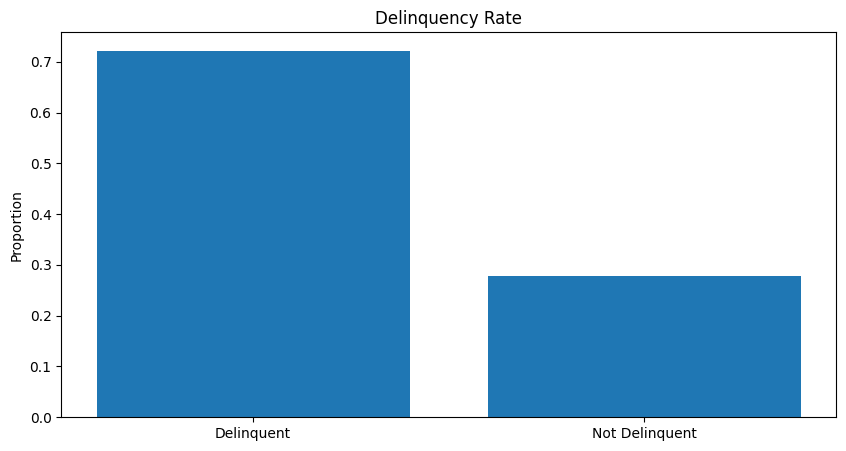

In [ ]:
# convert to datetime
df_combined['due_date'] = pd.to_datetime(df_combined['due_date'])
df_combined['created_at'] = pd.to_datetime(df_combined['created_at'])

# create 'is_delinquent'
df_combined['is_delinquent'] = (df_combined['ledger_status'] == 'UNPAID') & (df_combined['due_date'] < pd.Timestamp('today'))

# calculate delinquency rate
delinquency_rate = df_combined['is_delinquent'].mean()

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(['Delinquent', 'Not Delinquent'], [delinquency_rate, 1 - delinquency_rate])
plt.title('Delinquency Rate')
plt.ylabel('Proportion')
plt.show()

- If the proportion for 'Delinquent' is significantly higher than for 'Not Delinquent', this indicates a high level of late payments in the loan portfolio. This could be an indicator of a problem in the credit granting process or perhaps in the economy as a whole that is affecting the borrower's repayment ability.

- High levels of delinquency may indicate a greater credit risk for the lending institution, which may require a review of lending policies or risk management strategies.

#### Payment Trend Analysis

In [ ]:
df_combined['paid_off_date'] = pd.to_datetime(df_combined['paid_off_date'], errors='coerce')

# Add a column to specify the payment month
df_combined['payment_month'] = df_combined['paid_off_date'].dt.strftime('%Y-%m')

# Calculate the number of payment transactions that have been 'PAID' each month
payment_transactions_per_month = df_combined[df_combined['ledger_status'] == 'PAID'].groupby('payment_month').size().reset_index(name='payment_transactions')

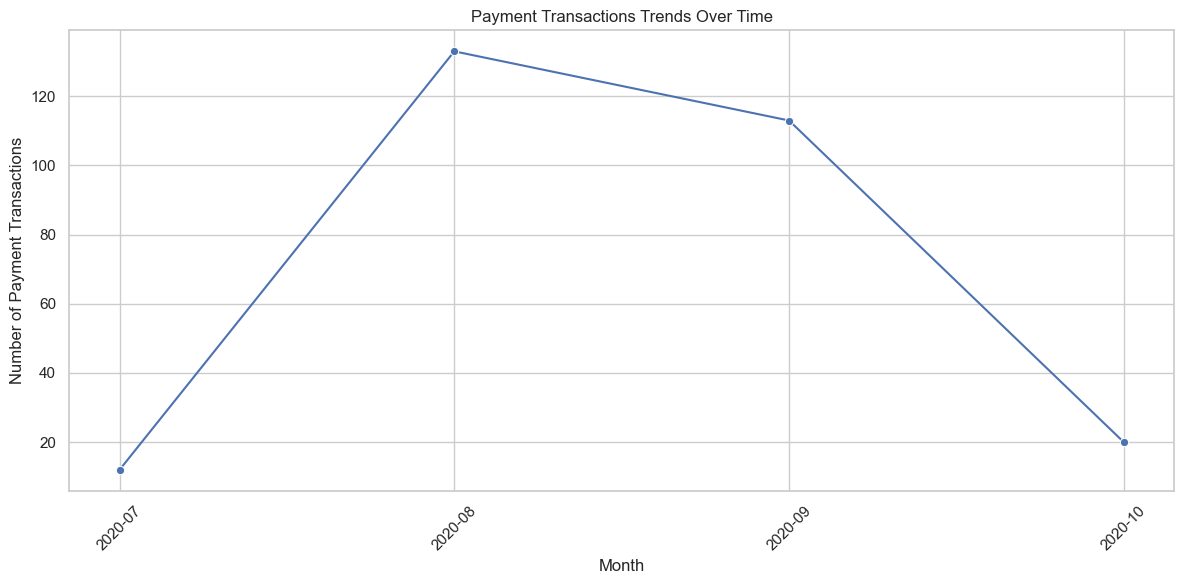

In [ ]:
# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=payment_transactions_per_month, x='payment_month', y='payment_transactions', marker='o')

plt.title('Payment Transactions Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Payment Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The trend reached its peak in August, marking the highest number of payment transactions in the period shown
- There was a sharp decline in the number of payment transactions from September to October. This sharp decline may also indicate a change in payment behavior due to seasonal factors or policy changes

#### Payment Success Rate Analysis

In [ ]:
# Add a successful or not payment column
lcl['is_paid_successfully'] = (lcl['ledger_status'] == 'PAID')

# Calculate the total of successful and failed payments for each contract
payment_success_rate = lcl.groupby('contract_id').agg({
    'is_paid_successfully': 'sum',  # Number of successful payments
    'ledger_id': 'count'  # The total amount of expected payments
}).rename(columns={'is_paid_successfully': 'successful_payments', 'ledger_id': 'expected_payments'})

# Calculate the payment success rate (proportion of successful payments)
payment_success_rate['success_rate'] = payment_success_rate['successful_payments'] / payment_success_rate['expected_payments']

payment_success_rate.describe()

,successful_payments,expected_payments,success_rate
count,100.000000,100.000000,100.000000
mean,2.790000,10.970000,0.327312
std,2.475312,3.251899,0.342073
min,0.000000,4.000000,0.000000
25%,0.000000,8.000000,0.000000
50%,3.000000,12.000000,0.285714
75%,4.250000,14.000000,0.616667
max,9.000000,14.000000,1.000000


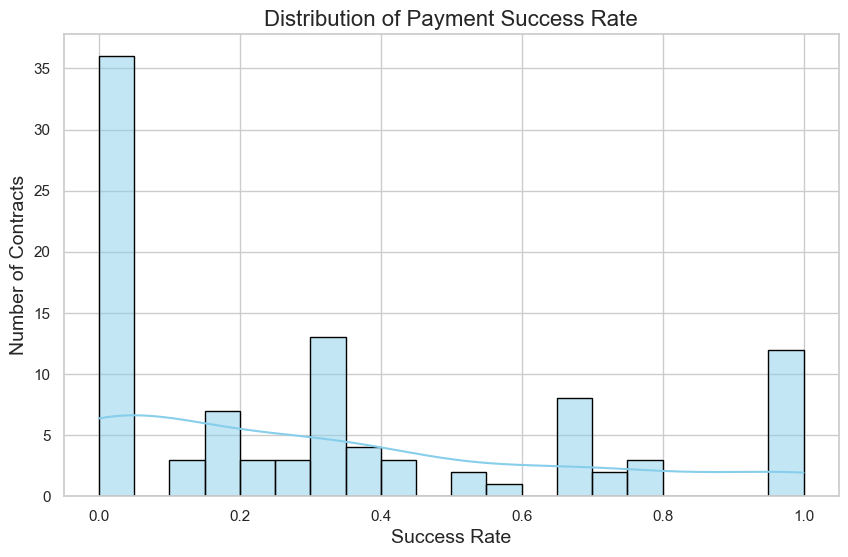

In [ ]:
sns.set_theme(style="whitegrid")

# Membuat histogram dengan Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=payment_success_rate, x='success_rate', bins=20, kde=True, color="skyblue", edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribution of Payment Success Rate', fontsize=16)
plt.xlabel('Success Rate', fontsize=14)
plt.ylabel('Number of Contracts', fontsize=14)

# Menampilkan grafik
plt.show()

- There are a large number of contracts that have a low payout success rate (close to 0). This shows that many contracts either failed to make payments or only managed to pay a small fraction of the expected amount.
- A high number of contracts with low repayment success rates may indicate cash flow problems or bad debts in the loan portfolio, which could require further attention.
- There are also some contracts that have a 100% payment success rate (close to 1). This means that payment has been made in full according to the expected amount.